# LDA model coherence

Calculating coherence for an example topic model computed from the Reuters news data set in the [lda package](https://lda.readthedocs.io/). The model was created in `lda_evaluation.py` with $K=120$ topics. A summary output of the topic model can be found in `examples/data/lda_evaluation_summary.xlsx`.

**Note:** Loading the model in the first cell will only work with Python 3 unfortunately.

See:

* *D. Mimno, H. Wallach, E. Talley, M. Leenders, A. McCullum 2011: Optimizing semantic coherence in topic models*
* *M. Röder, A. Both, A. Hinneburg 2015: Exploring the space of topic coherence measures*
* https://radimrehurek.com/gensim/models/coherencemodel.html
* https://rare-technologies.com/what-is-topic-coherence/

In [1]:
from tmtoolkit.topicmod.model_io import load_ldamodel_from_pickle

data = load_ldamodel_from_pickle('data/lda_evaluation_finalmodel.pickle')

model = data['model']
vocab = data['vocab']
doc_labels = data ['doc_labels']
dtm = data['dtm']

n_docs, n_topics = model.doc_topic_.shape
vocab_size = len(vocab)

print('model with %d topics learnt from %d documents with vocabulary size of %d unique words'
      % (n_topics, n_docs, vocab_size))

model with 120 topics learnt from 395 documents with vocabulary size of 4258 unique words


## Coherence metric from *Mimno et al. 2011*

Uses $\epsilon=1\mathrm{e}{-12}$ instead of $1$ and a normalizing factor like in *Röder et al. 2015* (where it is called $U_{mass}$ metric).

In [2]:
from tmtoolkit.topicmod.evaluate import metric_coherence_mimno_2011

coh = metric_coherence_mimno_2011(model.topic_word_, dtm, top_n=20)   # use top 20 words per topic for metric
assert coh.shape == (n_topics, )
coh

array([ -7.35851323,  -1.40267463,  -2.15268543,  -1.66410887,
        -6.55899382,  -1.97081467,  -7.74805254,  -1.16570974,
        -9.93082371,  -1.65315501,  -1.51187807,  -2.00110624,
        -9.67090862,  -4.91732356,  -8.69472035,  -9.56407409,
        -9.81443501,  -0.631579  ,  -4.55162818, -11.2032396 ,
       -10.47766516,  -1.53099262,  -8.89103223,  -1.68075424,
        -1.42169399,  -1.49462551,  -9.9438566 ,  -1.84990541,
        -1.16615927,  -0.9946462 ,  -1.84051519,  -1.08515521,
        -1.36863549,  -9.43377462,  -5.5957288 ,  -2.10202221,
        -1.71984172,  -2.46857418,  -3.68448792,  -4.49885444,
        -1.14900274,  -6.82709878,  -8.06761243,  -1.45332898,
        -5.42969938,  -1.19772016,  -1.08975398,  -5.96895388,
        -1.04500097,  -3.748624  ,  -1.75727347,  -1.48592656,
        -2.72475474,  -1.22259012,  -1.23141106,  -1.27267898,
        -1.43284754,  -3.92486645,  -5.1192178 ,  -1.57397124,
        -7.41871104,  -2.01547606,  -1.56790998,  -9.37

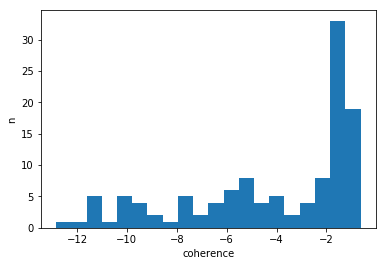

In [3]:
import matplotlib.pyplot as plt

plt.hist(coh, bins=20)
plt.xlabel('coherence')
plt.ylabel('n')
plt.show();

In [4]:
import numpy as np

top10_t_indices = np.argsort(coh)[::-1][:10]
bottom10_t_indices = np.argsort(coh)[:10]

print('top 10 topics (with best coherence values):')
print('-------------------------------------------')
for t_ind, t_coh in zip(top10_t_indices, coh[top10_t_indices]):
    print('topic_%d (coherence=%f)' % (t_ind+1, t_coh))

print('')
    
print('bottom 10 topics (with worst coherence values):')
print('-------------------------------------------')
for t_ind, t_coh in zip(bottom10_t_indices, coh[bottom10_t_indices]):
    print('topic_%d (coherence=%f)' % (t_ind+1, t_coh))

top 10 topics (with best coherence values):
-------------------------------------------
topic_18 (coherence=-0.631579)
topic_90 (coherence=-0.856656)
topic_30 (coherence=-0.994646)
topic_65 (coherence=-1.002855)
topic_49 (coherence=-1.045001)
topic_114 (coherence=-1.075425)
topic_32 (coherence=-1.085155)
topic_47 (coherence=-1.089754)
topic_97 (coherence=-1.102140)
topic_69 (coherence=-1.134923)

bottom 10 topics (with worst coherence values):
-------------------------------------------
topic_92 (coherence=-12.834969)
topic_118 (coherence=-11.645100)
topic_117 (coherence=-11.536257)
topic_82 (coherence=-11.281024)
topic_20 (coherence=-11.203240)
topic_120 (coherence=-11.072698)
topic_95 (coherence=-11.072404)
topic_21 (coherence=-10.477665)
topic_88 (coherence=-10.142447)
topic_27 (coherence=-9.943857)


In [5]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

top10_topics = model.topic_word_[top10_t_indices, :]
bottom10_topics = model.topic_word_[bottom10_t_indices, :]

print('10 most coherent topics:')
top10_topiclabels = ['topic_%d' % (i+1) for i in top10_t_indices]
print_ldamodel_topic_words(top10_topics, vocab, n_top=20, row_labels=top10_topiclabels)

10 most coherent topics:
topic_18
> #1. charles (0.056356)
> #2. diana (0.031728)
> #3. parker (0.023606)
> #4. bowles (0.023606)
> #5. camilla (0.023082)
> #6. prince (0.022034)
> #7. public (0.014436)
> #8. marriage (0.013650)
> #9. divorce (0.012864)
> #10. princess (0.012340)
> #11. royal (0.011030)
> #12. queen (0.010244)
> #13. throne (0.009458)
> #14. king (0.009196)
> #15. church (0.008934)
> #16. love (0.008672)
> #17. england (0.008148)
> #18. divorced (0.006838)
> #19. british (0.006838)
> #20. britons (0.006314)
topic_90
> #1. pope (0.042992)
> #2. vatican (0.015124)
> #3. hospital (0.014253)
> #4. surgery (0.013963)
> #5. doctors (0.011931)
> #6. operation (0.011350)
> #7. appendix (0.010770)
> #8. crucitti (0.009609)
> #9. tumour (0.009028)
> #10. medical (0.008448)
> #11. 1981 (0.008157)
> #12. gemelli (0.007577)
> #13. pontiff (0.006996)
> #14. removed (0.006996)
> #15. parkinson (0.006996)
> #16. disease (0.006706)
> #17. 1992 (0.006706)
> #18. tuesday (0.006125)
> #19

In [6]:
print('10 most incoherent topics:')
bottom10_topiclabels = ['topic_%d' % (i+1) for i in bottom10_t_indices]
print_ldamodel_topic_words(bottom10_topics, vocab, n_top=20, row_labels=bottom10_topiclabels)

10 most incoherent topics:
topic_92
> #1. hwang (0.022859)
> #2. farrakhan (0.019070)
> #3. ramos (0.014019)
> #4. chavis (0.012756)
> #5. korean (0.010230)
> #6. north (0.008967)
> #7. philippines (0.008967)
> #8. group (0.008967)
> #9. south (0.007704)
> #10. muhammad (0.006441)
> #11. manila (0.006441)
> #12. islam (0.006441)
> #13. hate (0.006441)
> #14. criticise (0.006441)
> #15. security (0.005178)
> #16. stay (0.005178)
> #17. benjamin (0.005178)
> #18. jewish (0.005178)
> #19. korea (0.005178)
> #20. jews (0.003915)
topic_118
> #1. actor (0.004700)
> #2. followed (0.002462)
> #3. alone (0.002462)
> #4. job (0.002462)
> #5. control (0.002462)
> #6. club (0.002462)
> #7. table (0.002462)
> #8. today (0.002462)
> #9. open (0.002462)
> #10. help (0.002462)
> #11. flown (0.002462)
> #12. sun (0.002462)
> #13. announced (0.002462)
> #14. happen (0.002462)
> #15. danger (0.002462)
> #16. watched (0.002462)
> #17. companion (0.002462)
> #18. side (0.002462)
> #19. pounds (0.002462)
> 

## Coherence metrics using Gensim

More coherence metrics can be used with the function `metric_coherence_gensim`. This requires of course that [gensim](https://radimrehurek.com/gensim/) is installed. Furthemore, most metrics require that a parameter `texts` is passed which is the tokenized text that was used to create the document-term matrix. For the Reuters news data set, the raw tokenized next is not available, hence we can't use any other coherence metric here.